In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = {
    'position' : ['Business analyst','Junior Consultant','Senior Consultant','Manager','Country Manager','Region Manager','Partner','Senior partner','C-level','CEO'],
    'level':[1,2,3,4,5,6,7,8,9,10],
    'salary' : [45000,50000,60000,80000,110000,150000,200000,300000,500000,1000000]
}

In [4]:
df = pd.DataFrame(data)
df

,position,level,salary
0,Business analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [7]:
X = df.iloc[:, 1:2].values.reshape(-1,1)
y = df.iloc[:, 2].values.reshape(-1,1)

In [8]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [9]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [13]:
y_pred = regressor.predict([[6.5]]).reshape(-1,1)
y_pred = sc_y.inverse_transform(y_pred) 

In [14]:
y_pred

array([[252789.13921624]])

/var/folders/jl/yh8ntf_x00bccncp3996v8lr0000gp/T/ipykernel_53990/1907058299.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01) #this step required because data is feature scaled.


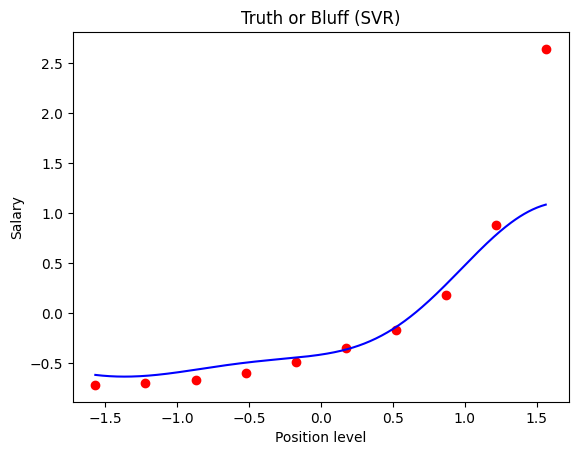

In [15]:
X_grid = np.arange(min(X), max(X), 0.01) #this step required because data is feature scaled.
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()